# Predicting defaults on Lending Club database


- Authors: Beltrán Aller López and Miguel López Garralón
- Date: 13/12/2019
- Email: b.aller@cunef.edu and m.lopez@cunef.edu
- Institution: CUNEF
- Version: 1.0

The main purpose of this project will be predict if a client of the Lending Club will do a default or will no do it. In order to get that, we are going to explore the dataset, analise the data and try to make a predictive model.

The steps are the following:

* Reading the data.
* Showing a little part of the data in order to get some knowledge about them.
* Choosing the most important variables of the dataset according to the Lending Club Dictionary and our own inquiries into the web.
* Filtering the data.
* Doing an exploratory data analysis.
* Making a predictive model.

Before doing anything, we will import the necessaries libraries.

In [1]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt # plots
import seaborn as sns # plots
from scipy import stats as sts # normality test JB
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import Ridge, RidgeCV # Ridge
from sklearn.linear_model import Lasso, LassoCV # Lasso
from sklearn.linear_model import LogisticRegression # Log Regression
from sklearn.metrics import r2_score # R^2
from sklearn.model_selection import train_test_split # split data
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error # MSE
from sklearn.preprocessing import StandardScaler # estandarization
from sklearn import preprocessing # estandarization
from sklearn.ensemble import IsolationForest # outliers
from math import sqrt # sqrt
import itertools # aplanar arrays
import math
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC # SVM
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import xgboost as xgb # XGBOOST
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve # ROC Curve
from sklearn.datasets import make_classification
import random
random.seed(1122019)
from sklearn.impute import KNNImputer

Using TensorFlow backend.


## 1. READING THE DATA

The dataset is kept into the data directory. In the same folder you can find the data dictionary.

In [2]:
loan = pd.read_csv('../data/loan_clean.csv')

C:\Users\migue\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 2. SHOWING A PART OF THE DATASET AND EXPLORING IT 

In [3]:
# Set seed
random.seed(1122019)

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332021 entries, 0 to 1332020
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 1.4+ GB


The dataset has 145 variables and 1,332,021 samples of them because we have filtered the original dataset with SQLite to reduce the number of rows from 2,260,667 rows to 1,332,021.

In [5]:
loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,30000,30000,30000.0,36 months,22.35,1151.16,D,D5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,40000,40000,40000.0,60 months,16.14,975.71,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,20000,20000,20000.0,36 months,7.56,622.68,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4500,4500,4500.0,36 months,11.31,147.99,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,8425,8425,8425.0,36 months,27.27,345.18,E,E5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,20000,20000,20000.0,60 months,17.97,507.55,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,6600,6600,6325.0,36 months,11.31,217.05,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,2500,2500,2475.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,4000,4000,4000.0,36 months,17.97,144.55,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,2700,2700,2675.0,36 months,8.19,84.85,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
type(loan)

pandas.core.frame.DataFrame

Tha dataset is a DataFrame.

## 3. CHOOSING VARIABLES

In [7]:
loan['loan_status'].value_counts(dropna=False)

Fully Paid                                             1041952
Charged Off                                             261655
Late (31-120 days)                                       21897
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

At first we are going to create a target based on the loan status. We have deleted with SQLite the rows which are 'Current' and 'In Grace Period' in loan status. The samples which are 'Fully Paid' and 'Does not meet the credit policy. Status: Fully Paid' will be encode as 0, the rest of rows will be considered as a default and encoded as 1.

In [8]:
loan['target'] = np.where((loan['loan_status'] == 'Fully Paid') | 
                          (loan['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid'), 0, 1)

Now we delete the loan status variable.

In [9]:
del loan['loan_status']

In [10]:
len(loan)

1332021

The dataset has a lot of variables but some of then give us future information that, at the beggining, it´s supossed the bank would not have them. It is necessary to delete them, because if we include them in our model, we could be at risk of being introducting noise and over information.

In [11]:
loan['earliest_cr_line']

0          Jan-2012
1          Jun-2009
2          Feb-1999
3          Dec-2003
4          Oct-1997
             ...   
1332016    Dec-2001
1332017    Sep-2004
1332018    Dec-2000
1332019    Mar-2001
1332020    Mar-2003
Name: earliest_cr_line, Length: 1332021, dtype: object

We have realised that there are some information about bankcards, inquiries, installment andrevolving that coul be redundant. It will be calculated the correlation coefficient of the variables of that type of accounts.

In [12]:
bankcards = loan.loc[:,['bc_util','mths_since_recent_bc','mths_since_recent_bc_dlq','num_actv_bc_tl',
                      'num_bc_sats','num_bc_tl','percent_bc_gt_75','total_bc_limit','bc_open_to_buy']]

In [13]:
corr1 = bankcards.corr()
corr1

,bc_util,mths_since_recent_bc,mths_since_recent_bc_dlq,num_actv_bc_tl,num_bc_sats,num_bc_tl,percent_bc_gt_75,total_bc_limit,bc_open_to_buy
bc_util,1.000000,0.144303,0.035283,0.077380,-0.175847,-0.160684,0.844549,-0.251095,-0.544308
mths_since_recent_bc,0.144303,1.000000,-0.088863,-0.251876,-0.287600,-0.221937,0.149103,-0.085299,-0.113162
mths_since_recent_bc_dlq,0.035283,-0.088863,1.000000,-0.013252,-0.035872,0.023141,0.029722,-0.075418,-0.068056
num_actv_bc_tl,0.077380,-0.251876,-0.013252,1.000000,0.829643,0.578236,0.034057,0.465972,0.235797
num_bc_sats,-0.175847,-0.287600,-0.035872,0.829643,1.000000,0.718157,-0.169484,0.595121,0.467031
num_bc_tl,-0.160684,-0.221937,0.023141,0.578236,0.718157,1.000000,-0.148776,0.483079,0.402815
percent_bc_gt_75,0.844549,0.149103,0.029722,0.034057,-0.169484,-0.148776,1.000000,-0.213747,-0.441544
total_bc_limit,-0.251095,-0.085299,-0.075418,0.465972,0.595121,0.483079,-0.213747,1.000000,0.837873
bc_open_to_buy,-0.544308,-0.113162,-0.068056,0.235797,0.467031,0.402815,-0.441544,0.837873,1.000000


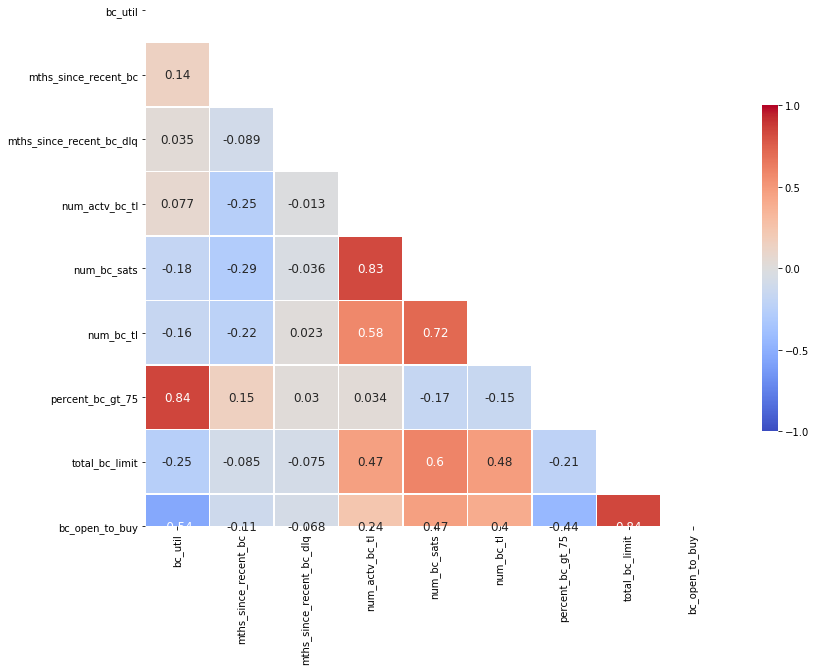

In [14]:
mask1 = np.zeros_like(corr1, dtype=np.bool)
mask1[np.triu_indices_from(mask1)]= True

f, ax = plt.subplots(figsize=(13, 15))
heatmap = sns.heatmap(corr1, 
                      square = True,
                      mask = mask1,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

ax.set_yticklabels(corr1.columns, rotation = 0)
ax.set_xticklabels(corr1.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [15]:
inquiries = loan.loc[:,['inq_fi','inq_last_6mths','inq_last_12m']]

In [16]:
corr2 = inquiries.corr()
corr2

,inq_fi,inq_last_6mths,inq_last_12m
inq_fi,1.000000,0.215999,0.563586
inq_last_6mths,0.215999,1.000000,0.478456
inq_last_12m,0.563586,0.478456,1.000000


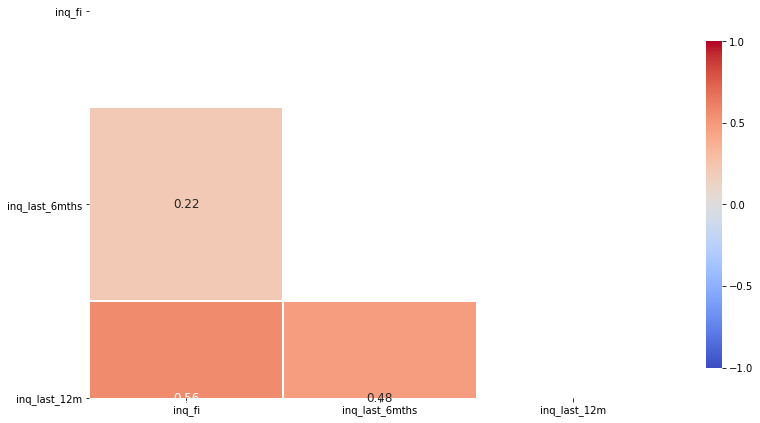

In [17]:
mask2 = np.zeros_like(corr2, dtype=np.bool)
mask2[np.triu_indices_from(mask2)]= True

f, ax = plt.subplots(figsize=(13, 15))
heatmap = sns.heatmap(corr2, 
                      square = True,
                      mask = mask2,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

ax.set_yticklabels(corr2.columns, rotation = 0)
ax.set_xticklabels(corr2.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

We can see that every sample of the variable 'inq_last_6m' is NaN, so I will delete it.

In [18]:
installments = loan.loc[:,['installment','mo_sin_old_il_acct','mths_since_rcnt_il','num_il_tl','open_il_12m',
                          'open_il_24m','open_act_il','total_bal_il','total_il_high_credit_limit']]

In [19]:
corr3 = installments.corr()
corr3

,installment,mo_sin_old_il_acct,mths_since_rcnt_il,num_il_tl,open_il_12m,open_il_24m,open_act_il,total_bal_il,total_il_high_credit_limit
installment,1.000000,0.101739,-0.017409,0.061856,0.013849,0.036568,0.025877,0.140364,0.185324
mo_sin_old_il_acct,0.101739,1.000000,0.063401,0.334708,0.039999,0.052827,0.146268,0.199706,0.203265
mths_since_rcnt_il,-0.017409,0.063401,1.000000,-0.244297,-0.440243,-0.476413,-0.220371,-0.242227,-0.261439
num_il_tl,0.061856,0.334708,-0.244297,1.000000,0.346572,0.470940,0.631958,0.581740,0.588050
open_il_12m,0.013849,0.039999,-0.440243,0.346572,1.000000,0.754253,0.272435,0.299319,0.285297
open_il_24m,0.036568,0.052827,-0.476413,0.470940,0.754253,1.000000,0.358533,0.367973,0.374563
open_act_il,0.025877,0.146268,-0.220371,0.631958,0.272435,0.358533,1.000000,0.556968,0.551935
total_bal_il,0.140364,0.199706,-0.242227,0.581740,0.299319,0.367973,0.556968,1.000000,0.957439
total_il_high_credit_limit,0.185324,0.203265,-0.261439,0.588050,0.285297,0.374563,0.551935,0.957439,1.000000


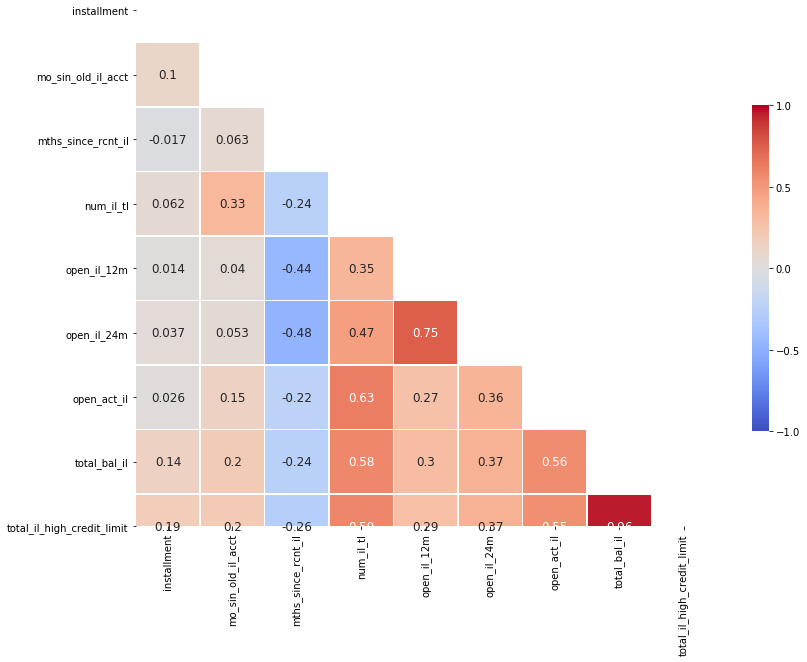

In [20]:
mask3 = np.zeros_like(corr3, dtype=np.bool)
mask3[np.triu_indices_from(mask3)]= True

f, ax = plt.subplots(figsize=(13, 15))
heatmap = sns.heatmap(corr3, 
                      square = True,
                      mask = mask3,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

ax.set_yticklabels(corr3.columns, rotation = 0)
ax.set_xticklabels(corr3.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

I realise that 'num_it_tl' is NaN.

In [21]:
revolvings = loan.loc[:,['max_bal_bc','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mths_since_recent_revol_delinq',
                        'num_actv_rev_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','open_rv_12m',
                        'open_rv_24m','revol_bal','revol_util','total_rev_hi_lim','revol_bal_joint']]

In [22]:
corr4 = revolvings.corr()
corr4

,max_bal_bc,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mths_since_recent_revol_delinq,num_actv_rev_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,open_rv_12m,open_rv_24m,revol_bal,revol_util,total_rev_hi_lim,revol_bal_joint
max_bal_bc,1.000000,0.214292,0.094079,-0.016024,0.128519,0.092334,0.118634,0.123266,-0.090266,-0.103257,0.557214,0.325275,0.475041,0.526619
mo_sin_old_rev_tl_op,0.214292,1.000000,0.066444,-0.007784,0.158792,0.193923,0.359191,0.155146,-0.019358,-0.048781,0.219440,0.007760,0.248655,0.203212
mo_sin_rcnt_rev_tl_op,0.094079,0.066444,1.000000,-0.062087,-0.230474,-0.284065,-0.238983,-0.227680,-0.466787,-0.456436,0.027366,0.176830,-0.045238,0.028351
mths_since_recent_revol_delinq,-0.016024,-0.007784,-0.062087,1.000000,-0.005407,-0.045595,-0.021076,-0.007468,0.075609,0.097677,-0.037967,0.024991,-0.058485,0.016211
num_actv_rev_tl,0.128519,0.158792,-0.230474,-0.005407,1.000000,0.791299,0.568143,0.981934,0.362321,0.455526,0.297132,0.106409,0.306013,0.308206
num_op_rev_tl,0.092334,0.193923,-0.284065,-0.045595,0.791299,1.000000,0.774783,0.795636,0.452323,0.582498,0.234046,-0.205316,0.407229,0.257315
num_rev_accts,0.118634,0.359191,-0.238983,-0.021076,0.568143,0.774783,1.000000,0.564563,0.374088,0.475587,0.214290,-0.177520,0.357329,0.249731
num_rev_tl_bal_gt_0,0.123266,0.155146,-0.227680,-0.007468,0.981934,0.795636,0.564563,1.000000,0.350402,0.446375,0.296944,0.115644,0.303836,0.309145
open_rv_12m,-0.090266,-0.019358,-0.466787,0.075609,0.362321,0.452323,0.374088,0.350402,1.000000,0.773406,-0.003579,-0.198973,0.120389,-0.023772
open_rv_24m,-0.103257,-0.048781,-0.456436,0.097677,0.455526,0.582498,0.475587,0.446375,0.773406,1.000000,0.001388,-0.216810,0.145738,-0.007114


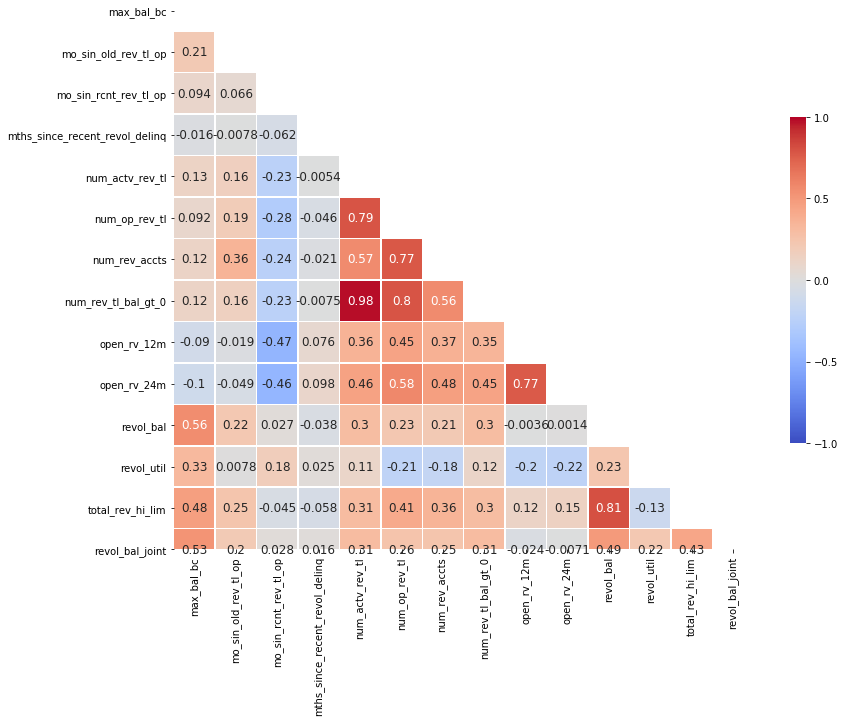

In [23]:
mask4 = np.zeros_like(corr4, dtype=np.bool)
mask4[np.triu_indices_from(mask4)]= True

f, ax = plt.subplots(figsize=(13, 15))
heatmap = sns.heatmap(corr4, 
                      square = True,
                      mask = mask4,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

ax.set_yticklabels(corr4.columns, rotation = 0)
ax.set_xticklabels(corr4.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

Now we know we have to delete 'num_rev_tl_bal_gt_o' or 'num_act_rev_tl'. I delete the second variable because it gives us less knowledge about the target. That variable gives us information about the trades with a balance over zero.

In [24]:
del loan['num_rev_tl_bal_gt_0']

In order to clean the dataset, the next step will be prove how many NaN we have it.

In [25]:
percentage_NaN = loan.apply(lambda x: sum(x.isna()/len(loan)))
percentage_NaN.sort_values(ascending = False).head(40)

id                                            1.000000
member_id                                     1.000000
url                                           1.000000
orig_projected_additional_accrued_interest    0.996168
sec_app_mths_since_last_major_derog           0.994782
deferral_term                                 0.994592
hardship_length                               0.994592
hardship_type                                 0.994592
hardship_reason                               0.994592
hardship_status                               0.994592
hardship_amount                               0.994592
hardship_start_date                           0.994592
hardship_end_date                             0.994592
payment_plan_start_date                       0.994592
hardship_dpd                                  0.994592
hardship_loan_status                          0.994592
hardship_payoff_balance_amount                0.994592
hardship_last_payment_amount                  0.994592
sec_app_re

## 4. FILTERING DATA

We want to keep the biggest number of variables at the beggining, because the more number of variables you have, the more possibilities you have to generate a better prediction model. In order to continue with that philosophy, we will only delete the variables with a percentage over the 95%.

In [26]:
NaN = pd.DataFrame(round(loan.isnull().sum()/len(loan.index)*100,2),columns=['null_percent'])

In [27]:
Filtro = NaN['null_percent']>95
Nulls = NaN[Filtro]
loan_filtered = loan.drop(list(Nulls.index), axis=1)

We check the dimension of the dataset.

In [28]:
loan_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332021 entries, 0 to 1332020
Columns: 106 entries, loan_amnt to target
dtypes: float64(79), int32(1), int64(4), object(22)
memory usage: 1.0+ GB


The percentage of NaN is the following.

In [29]:
percentage_NaN = loan_filtered.apply(lambda x: sum(x.isna()/len(loan_filtered)))
percentage_NaN.sort_values(ascending = False).head(40)

desc                              0.905579
mths_since_last_record            0.829347
mths_since_recent_bc_dlq          0.762917
mths_since_last_major_derog       0.736982
mths_since_recent_revol_delinq    0.665836
il_util                           0.660077
mths_since_rcnt_il                0.617691
all_util                          0.607328
inq_last_12m                      0.607286
total_cu_tl                       0.607286
open_acc_6m                       0.607286
open_act_il                       0.607285
inq_fi                            0.607285
max_bal_bc                        0.607285
open_rv_24m                       0.607285
open_rv_12m                       0.607285
total_bal_il                      0.607285
open_il_24m                       0.607285
open_il_12m                       0.607285
mths_since_last_delinq            0.503738
mths_since_recent_inq             0.130950
num_tl_120dpd_2m                  0.090065
mo_sin_old_il_acct                0.081042
emp_title  

We will proceed with the attribution of the NaN, some of those variables could have a NaN as value due to the inexistance of that type of account, so the correctly assignment will be give them a zero or calculateing the maximum. 

Values will be zero due to the customer has never done that action or now he/she is not commiting it and if he/she has not that type of account at this moment or or he/she has never had that type of account.

* 'il_util', ratio of total current balance to high credit/credit limit on all install account. 
* 'all_util', balance to credit limit on all trades. 
* 'inq_last_12m', number of credit inquiries in past 12 months. 
* 'total_cu_tl', number of finance trades.
* 'open_acc_6m', number of open trades in last 6 months.
* 'open_act_il', number of currently active installment trades.
* 'inq_fi', number of personal finance inquiries.
* 'max_bal_bc', maximum current balance owed on all revolving accounts.
* 'open_rv_12m', number of revolving trades opened in past 12 months.
* 'open_rv_24m', number of revolving trades opened in past 24 months.
* 'total_bal_il', total current balance of all installment accounts.
* 'open_il_12m', number of installment accounts opened in past 12 months.
* 'open_il_24m', number of installment accounts opened in past 24 months.

There are other kind of variables that they will be enconding calculateing the maximum of them.

* 'mths_since_last_record', the number of months since the last public record.
* 'mths_since_recent_bc_dlq', months since most recent bankcard delinquency,
* 'mths_since_recent_revol_delinq', months since most recent revolving delinquency.
* 'mths_since_rcnt_il', months since most recent installment accounts opened.
* 'mths_since_last_delinq', the number of months since the borrower's last delinquency.
* 'mths_since_recent_inq', months since most recent inquiry.

In [30]:
def fill_w_0(data, column):
    data[column].fillna(0, inplace = True)

In [31]:
def fill_max(data, column):
    data[column].fillna(data[column].max(), inplace = True) 

In [32]:
# refilling with 0

fill_w_0(loan_filtered, 'il_util')
fill_w_0(loan_filtered, 'all_util')
fill_w_0(loan_filtered, 'inq_last_12m')
fill_w_0(loan_filtered, 'total_cu_tl')
fill_w_0(loan_filtered, 'open_acc_6m')
fill_w_0(loan_filtered, 'open_act_il')
fill_w_0(loan_filtered, 'inq_fi')
fill_w_0(loan_filtered, 'max_bal_bc')
fill_w_0(loan_filtered, 'open_rv_12m')
fill_w_0(loan_filtered, 'open_rv_24m')
fill_w_0(loan_filtered, 'total_bal_il')
fill_w_0(loan_filtered, 'open_il_12m')
fill_w_0(loan_filtered, 'open_il_24m')

In [33]:
# refilling with the maximum

fill_max(loan_filtered, 'mths_since_last_record')
fill_max(loan_filtered, 'mths_since_recent_bc_dlq')
fill_max(loan_filtered, 'mths_since_recent_revol_delinq')
fill_max(loan_filtered, 'mths_since_last_major_derog')
fill_max(loan_filtered, 'mths_since_rcnt_il')
fill_max(loan_filtered, 'mths_since_last_delinq')
fill_max(loan_filtered, 'mths_since_recent_inq')

Now the percentage of NaN is:

In [34]:
percentage_NaN = loan_filtered.apply(lambda x: sum(x.isna()/len(loan_filtered)))
percentage_NaN.sort_values(ascending = False).head(25)

desc                          0.905579
num_tl_120dpd_2m              0.090065
mo_sin_old_il_acct            0.081042
emp_title                     0.064013
emp_length                    0.058450
pct_tl_nvr_dlq                0.052875
avg_cur_bal                   0.052776
mo_sin_old_rev_tl_op          0.052760
mo_sin_rcnt_rev_tl_op         0.052760
num_rev_accts                 0.052760
tot_coll_amt                  0.052759
num_actv_bc_tl                0.052759
num_actv_rev_tl               0.052759
num_bc_tl                     0.052759
num_il_tl                     0.052759
num_op_rev_tl                 0.052759
num_tl_op_past_12m            0.052759
num_tl_30dpd                  0.052759
num_tl_90g_dpd_24m            0.052759
mo_sin_rcnt_tl                0.052759
tot_hi_cred_lim               0.052759
total_rev_hi_lim              0.052759
total_il_high_credit_limit    0.052759
tot_cur_bal                   0.052759
num_accts_ever_120_pd         0.052759
dtype: float64

Now, we are going to fill de NAs values of the 'desc' column with zeros. We will transform this column in a dummy variable, if we don´t have the description we will obtain a 0, if something was written at the description, we will obtain the value = 1.

In [35]:
loan_filtered['desc'].fillna(0, inplace = True)
loan_filtered['desc'] = np.where(loan_filtered['desc'] != 0, 1, 0)
loan_filtered['desc'].value_counts(normalize=True)

0    0.905579
1    0.094421
Name: desc, dtype: float64

We want to know hoy many samples have we got with NAs, so we will count the number rows with NAs.

In [36]:
len(loan_filtered) - len(loan_filtered.dropna())

255561

We have around 250 000 of rows with NAs.It represents aproximately the 19% of the rows.

Now we will create 2 distinct dataframes ir order to split numerical and categorical variables, we need to work in a different way with them.

In [37]:
numericas = loan_filtered.select_dtypes(include = [np.number])
categoricas = loan_filtered.select_dtypes(include = [np.object])

In [38]:
numericas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332021 entries, 0 to 1332020
Data columns (total 85 columns):
loan_amnt                         1332021 non-null int64
funded_amnt                       1332021 non-null int64
funded_amnt_inv                   1332021 non-null float64
int_rate                          1332021 non-null float64
installment                       1332021 non-null float64
annual_inc                        1332017 non-null float64
desc                              1332021 non-null int32
dti                               1331673 non-null float64
delinq_2yrs                       1331992 non-null float64
inq_last_6mths                    1331991 non-null float64
mths_since_last_delinq            1332021 non-null float64
mths_since_last_record            1332021 non-null float64
open_acc                          1331992 non-null float64
pub_rec                           1331992 non-null float64
revol_bal                         1332021 non-null int64
revol_util

In [39]:
categoricas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332021 entries, 0 to 1332020
Data columns (total 21 columns):
term                    1332021 non-null object
grade                   1332021 non-null object
sub_grade               1332021 non-null object
emp_title               1246754 non-null object
emp_length              1254165 non-null object
home_ownership          1332021 non-null object
verification_status     1332021 non-null object
issue_d                 1332021 non-null object
pymnt_plan              1332021 non-null object
purpose                 1332021 non-null object
title                   1316202 non-null object
zip_code                1332020 non-null object
addr_state              1332021 non-null object
earliest_cr_line        1331992 non-null object
initial_list_status     1332021 non-null object
last_pymnt_d            1329595 non-null object
last_credit_pull_d      1331964 non-null object
application_type        1332021 non-null object
hardship_flag          

In [40]:
categoricas.nunique()

term                         2
grade                        7
sub_grade                   35
emp_title               377141
emp_length                  11
home_ownership               6
verification_status          3
issue_d                    139
pymnt_plan                   2
purpose                     14
title                    63150
zip_code                   946
addr_state                  51
earliest_cr_line           738
initial_list_status          2
last_pymnt_d               135
last_credit_pull_d         140
application_type             2
hardship_flag                2
disbursement_method          2
debt_settlement_flag         2
dtype: int64

We impute the NaN of numeric variables by the mean of each variable.

In [41]:
numericas = numericas.apply(lambda x: x.replace("", np.nan))
numericas = numericas.apply(lambda x: x.fillna(x.mean()))

In [42]:
numericas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332021 entries, 0 to 1332020
Data columns (total 85 columns):
loan_amnt                         1332021 non-null int64
funded_amnt                       1332021 non-null int64
funded_amnt_inv                   1332021 non-null float64
int_rate                          1332021 non-null float64
installment                       1332021 non-null float64
annual_inc                        1332021 non-null float64
desc                              1332021 non-null int64
dti                               1332021 non-null float64
delinq_2yrs                       1332021 non-null float64
inq_last_6mths                    1332021 non-null float64
mths_since_last_delinq            1332021 non-null float64
mths_since_last_record            1332021 non-null float64
open_acc                          1332021 non-null float64
pub_rec                           1332021 non-null float64
revol_bal                         1332021 non-null int64
revol_util

We impute the NaN of categorical variables by the mode of each variable.

In [43]:
categoricas = categoricas.apply(lambda x: x.replace("", np.nan))
categoricas = categoricas.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [44]:
categoricas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332021 entries, 0 to 1332020
Data columns (total 21 columns):
term                    1332021 non-null object
grade                   1332021 non-null object
sub_grade               1332021 non-null object
emp_title               1332021 non-null object
emp_length              1332021 non-null object
home_ownership          1332021 non-null object
verification_status     1332021 non-null object
issue_d                 1332021 non-null object
pymnt_plan              1332021 non-null object
purpose                 1332021 non-null object
title                   1332021 non-null object
zip_code                1332021 non-null object
addr_state              1332021 non-null object
earliest_cr_line        1332021 non-null object
initial_list_status     1332021 non-null object
last_pymnt_d            1332021 non-null object
last_credit_pull_d      1332021 non-null object
application_type        1332021 non-null object
hardship_flag          

In [45]:
categoricas.nunique()

term                         2
grade                        7
sub_grade                   35
emp_title               377141
emp_length                  11
home_ownership               6
verification_status          3
issue_d                    139
pymnt_plan                   2
purpose                     14
title                    63150
zip_code                   946
addr_state                  51
earliest_cr_line           738
initial_list_status          2
last_pymnt_d               135
last_credit_pull_d         140
application_type             2
hardship_flag                2
disbursement_method          2
debt_settlement_flag         2
dtype: int64

In [46]:
loan_filtered = pd.concat([numericas, categoricas], axis = 1)

There are some variables wich have a lot of categories, more than we can deal with, so we will delete them. Another variables, due to a research, we discover that give us information wich we would not have when we were going to give a loan.

In [47]:
del loan_filtered['sub_grade']
del loan_filtered['emp_title']
del loan_filtered['issue_d']

# we can not use neither the zip code nor the state adress, so we will delete them of the model, but we will
# do a copy of them in a local variable

zip_code = loan_filtered['zip_code']
del loan_filtered['zip_code']

addr_state = loan_filtered['addr_state']
del loan_filtered['addr_state']

del loan_filtered['title']
del loan_filtered['last_credit_pull_d']
del loan_filtered['last_pymnt_d']
del loan_filtered['debt_settlement_flag']
del loan_filtered['total_pymnt']
del loan_filtered['total_pymnt_inv']
del loan_filtered['total_rec_int']
del loan_filtered['total_rec_late_fee']
del loan_filtered['total_rec_prncp']
del loan_filtered['last_pymnt_amnt']
del loan_filtered['out_prncp']
del loan_filtered['out_prncp_inv']
del loan_filtered['hardship_flag']
del loan_filtered['pymnt_plan']

In [48]:
loan_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332021 entries, 0 to 1332020
Data columns (total 87 columns):
loan_amnt                         1332021 non-null int64
funded_amnt                       1332021 non-null int64
funded_amnt_inv                   1332021 non-null float64
int_rate                          1332021 non-null float64
installment                       1332021 non-null float64
annual_inc                        1332021 non-null float64
desc                              1332021 non-null int64
dti                               1332021 non-null float64
delinq_2yrs                       1332021 non-null float64
inq_last_6mths                    1332021 non-null float64
mths_since_last_delinq            1332021 non-null float64
mths_since_last_record            1332021 non-null float64
open_acc                          1332021 non-null float64
pub_rec                           1332021 non-null float64
revol_bal                         1332021 non-null int64
revol_util

There is a variable which we consider of vital importance, 'earliest_cr_line' indicates when the borrower's credit file started, the longer is the credit file, the more we can trust in the borrower.

In [49]:
x = loan_filtered['earliest_cr_line'] # we do a copy

In [50]:
x = x.astype(str) # convert to string

In [51]:
len(x) # show the length

1332021

In [52]:
x = x.map(lambda x: x.split('-')) # splitting by the '-'

In [53]:
x.iloc[2] # show a sample

['Feb', '1999']

In [54]:
x.max()

['Sep', '2015']

In [55]:
# we calculate the length of the credit file substracting the currently year and the year the credit file was born

x = x.map(lambda x: 2019 - int(x[1]))

In [56]:
x # the final result

0           7
1          10
2          20
3          16
4          22
           ..
1332016    18
1332017    15
1332018    19
1332019    18
1332020    16
Name: earliest_cr_line, Length: 1332021, dtype: int64

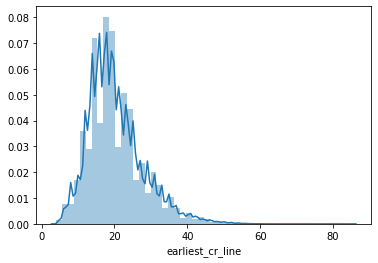

In [57]:
# histogram of credit file years

sns.distplot(x);

In [58]:
loan_filtered['earliest_cr_line'] = x # replacing the variable, now is numeric
del x

'home_ownership' has a lot of categories, when we will go to make dummies it will return us so many variables, in order to prevent it, we will reduce the dimension of this variable rencoding it.

In [59]:
loan_filtered['home_ownership'].value_counts()

MORTGAGE    657895
RENT        530384
OWN         143224
ANY            283
OTHER          182
NONE            53
Name: home_ownership, dtype: int64

In [60]:
loan_filtered['home_ownership'] = np.where((loan_filtered['home_ownership'] != 'OWN') & (loan_filtered['home_ownership'] != 'RENT'),
                                    'OTHER', loan_filtered['home_ownership'].values)

In [61]:
loan_filtered['home_ownership'].value_counts()

OTHER    658413
RENT     530384
OWN      143224
Name: home_ownership, dtype: int64

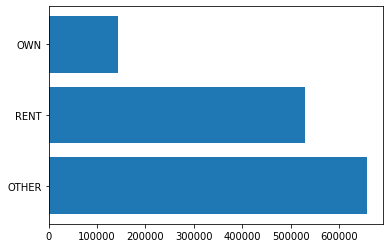

In [62]:
# barplot of homeownership

height = loan_filtered['home_ownership'].value_counts()
bars = ('OTHER', 'RENT', 'OWN')
y_pos = np.arange(len(bars))

# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
 
# Show graphic
plt.show()

The next step will be rencoding the variable 'emp_length', now we have 11 different values, we are going to rencode the variable ir order to have only 2 different values:
* From less than 1 year to 5 years.
* From 6 years to 10 years or more.

In [63]:
loan_filtered['emp_length'].value_counts()

10+ years    514743
2 years      120498
< 1 year     107340
3 years      106577
1 year        87840
5 years       83378
4 years       79799
6 years       62161
8 years       60161
7 years       59144
9 years       50380
Name: emp_length, dtype: int64

In [64]:
loan_filtered['emp_length'] = np.where((loan_filtered['emp_length'] == '< 1 year') | 
                                       (loan_filtered['emp_length'] == '1 year') |
                                       (loan_filtered['emp_length'] == '2 years') | 
                                       (loan_filtered['emp_length'] == '3 years') | 
                                       (loan_filtered['emp_length'] == '4 years') | 
                                       (loan_filtered['emp_length'] == '5 years'), 
                                       '<= 5 years', '6+ years')

We view the new values.

In [65]:
loan_filtered['emp_length'].value_counts()

6+ years      746589
<= 5 years    585432
Name: emp_length, dtype: int64

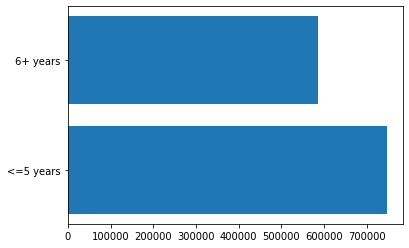

In [66]:
# barplot of emp_length

height = loan_filtered['emp_length'].value_counts()
bars = ('<=5 years', '6+ years')
y_pos = np.arange(len(bars))

# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
 
# Show graphic
plt.show()

In order to maintain the variable 'grade' and do not create as dummies as categories has the variable, we will apply an ordinal encondig to the variable. The method will be the following:
* We have 7 categories from best grade, 'A', to the worst grade 'G'.
* The order is A > B > C > D > E > F > G.
* The new encoding will be 6 > 5 > 4 > 3 > 2 > 1 > 0

In [67]:
loan_filtered['grade'].value_counts()

B    386094
C    379533
A    227924
D    201793
E     94671
F     32564
G      9442
Name: grade, dtype: int64

In [68]:
# first we create a mapper

mapper = {'A': 6, 'B': 5, 'C': 4, 'D': 3, 'E': 2, 'F': 1, 'G': 0}

# now we map the column and replace the values

loan_filtered['grade'] = loan_filtered['grade'].replace(mapper)

According to some financial papers, the loan purpose can serve as a method to decide the risk of the loan. We are going to see the different values of our variable 'purpose'.

In [69]:
loan_filtered['purpose'].value_counts()

debt_consolidation    773524
credit_card           290837
home_improvement       86410
other                  77317
major_purchase         29124
small_business         15583
medical                15454
car                    14429
moving                  9430
vacation                8952
house                   7257
wedding                 2350
renewable_energy         931
educational              423
Name: purpose, dtype: int64

How does affect the purpose in our target?

In [70]:
loan_filtered.groupby('purpose')['target'].value_counts()

purpose             target
car                 0          12104
                    1           2325
credit_card         0         237329
                    1          53508
debt_consolidation  0         597360
                    1         176164
educational         0            335
                    1             88
home_improvement    0          69553
                    1          16857
house               0           5487
                    1           1770
major_purchase      0          23124
                    1           6000
medical             0          11768
                    1           3686
moving              0           7053
                    1           2377
other               0          59373
                    1          17944
renewable_energy    0            697
                    1            234
small_business      0          10634
                    1           4949
vacation            0           7065
                    1           1887
wedding    

We need to reduce the number of types, so we will create new 6 new types in which they will be aggregate the currently types. 

* debt_consolidation: 'debt_consolidation'.
* home: which will include 'home_improvement', 'house' and 'moving'.
* purchase: includes 'credit_card', 'major_purchase', 'vacation', 'car' and 'wedding'.
* investment: includes 'small_business' and 'renewable_energy'.
* medical: 'medical'.
* other: includes 'other' and 'educational'.

In [71]:
# home

loan_filtered['purpose'] = np.where((loan_filtered['purpose'] == 'home_improvement') | 
                                    (loan_filtered['purpose'] == 'house') | 
                                    (loan_filtered['purpose'] == 'moving'), 
                                   'home', loan_filtered['purpose'].values)

In [72]:
# purchase

loan_filtered['purpose'] = np.where((loan_filtered['purpose'] == 'credit_card') | 
                                    (loan_filtered['purpose'] == 'major_purchase') | 
                                    (loan_filtered['purpose'] == 'vacation') | 
                                    (loan_filtered['purpose'] == 'wedding') |
                                    (loan_filtered['purpose'] == 'car'), 
                                   'purchase', loan_filtered['purpose'].values)

In [73]:
# investment

loan_filtered['purpose'] = np.where((loan_filtered['purpose'] == 'small_business') | 
                                    (loan_filtered['purpose'] == 'renewable_energy'), 
                                   'investment', loan_filtered['purpose'].values)

In [74]:
# other

loan_filtered['purpose'] = np.where((loan_filtered['purpose'] == 'other') | 
                                    (loan_filtered['purpose'] == 'educational'), 
                                   'other', loan_filtered['purpose'].values)

In [75]:
loan_filtered['purpose'].value_counts()

debt_consolidation    773524
purchase              345692
home                  103097
other                  77740
investment             16514
medical                15454
Name: purpose, dtype: int64

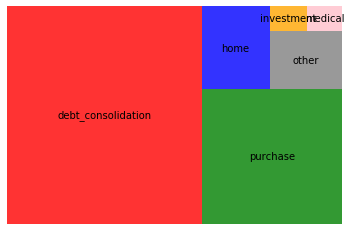

In [78]:
df = pd.DataFrame({'purpose':loan_filtered['purpose'].value_counts(), 'group':["debt_consolidation", 
                                                                                 "purchase", "home", "other", 
                                                                                 "investment", "medical"] })
import squarify 
squarify.plot(sizes=df['purpose'], label=df['group'], color=["red","green","blue", "grey", "orange", "pink"], alpha=.8)
plt.axis('off')
plt.show()

There are some variables in our dataset, e.g 'pymnt_plan' or 'hardship_flag', which by themselves are dummies, we only need to rencode them ir order to change their types from categorical to numeric.

In [79]:
loan_filtered.groupby('initial_list_status')['target'].value_counts()

initial_list_status  target
f                    0         445808
                     1         115046
w                    0         598132
                     1         173035
Name: target, dtype: int64

In [80]:
# fractioned

85026/(334597+85026)

0.20262473696627686

In [81]:
# whole

139888/(139888+516949)

0.21297216813303757

'initial_list_status' give us information about if the lending club offered the whole loan to the borrower or only a fraction of the loan. Independently of that, we want to know if the borrower will pay the loan. We do not mind if the loan was given fully or partially. Also, we can see that the percentage of defaults its similar in both types of status.

In [82]:
del loan_filtered['initial_list_status']

In [83]:
loan_filtered.groupby('disbursement_method')['target'].value_counts()

disbursement_method  target
Cash                 0         1039374
                     1          286294
DirectPay            0            4566
                     1            1787
Name: target, dtype: int64

In [84]:
# cash

223497/(223497+847573)

0.20866703390067876

In [85]:
# direct pay

1417/(1417+3973)

0.26289424860853433

According to the same reason we delete 'disbursement_method'.

In [86]:
del loan_filtered['disbursement_method']

Due to all the transformations done, the index of the dataframe has changed and it does not follow the typical sequency of numbers, so we will reset the index to avoid future problems.

In [87]:
loan_filtered = loan_filtered.reset_index(drop = True)

In [88]:
categoricas = loan_filtered.select_dtypes(include = [np.object])
categoricas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332021 entries, 0 to 1332020
Data columns (total 6 columns):
term                   1332021 non-null object
emp_length             1332021 non-null object
home_ownership         1332021 non-null object
verification_status    1332021 non-null object
purpose                1332021 non-null object
application_type       1332021 non-null object
dtypes: object(6)
memory usage: 61.0+ MB


In [89]:
numericas = loan_filtered.select_dtypes(include = [np.number])
numericas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332021 entries, 0 to 1332020
Data columns (total 79 columns):
loan_amnt                         1332021 non-null int64
funded_amnt                       1332021 non-null int64
funded_amnt_inv                   1332021 non-null float64
int_rate                          1332021 non-null float64
installment                       1332021 non-null float64
annual_inc                        1332021 non-null float64
desc                              1332021 non-null int64
dti                               1332021 non-null float64
delinq_2yrs                       1332021 non-null float64
inq_last_6mths                    1332021 non-null float64
mths_since_last_delinq            1332021 non-null float64
mths_since_last_record            1332021 non-null float64
open_acc                          1332021 non-null float64
pub_rec                           1332021 non-null float64
revol_bal                         1332021 non-null int64
revol_util

At this moment we have our dataset clean, filtered and dimensionally reduced, so we can continue with other instances.

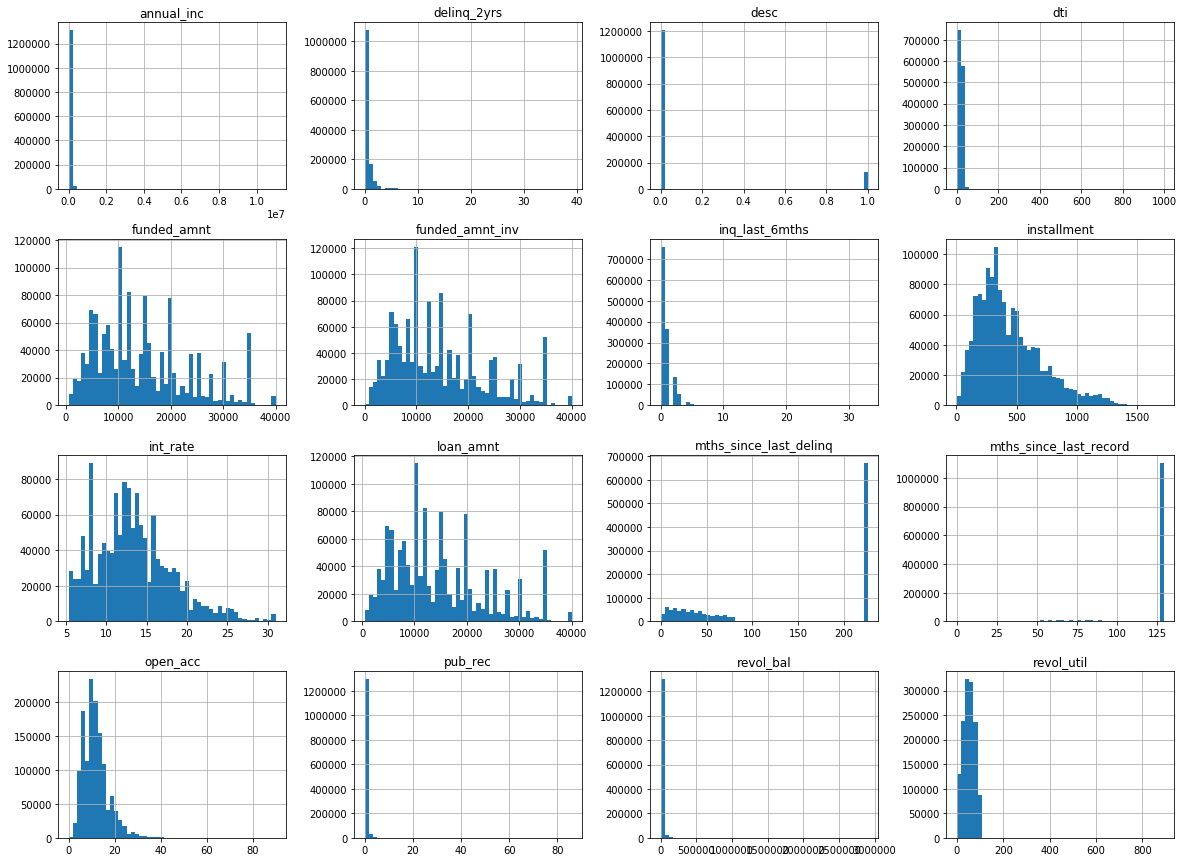

In [90]:
numericas.iloc[:,0:16].hist(bins=50, figsize=(20,15))
plt.show()

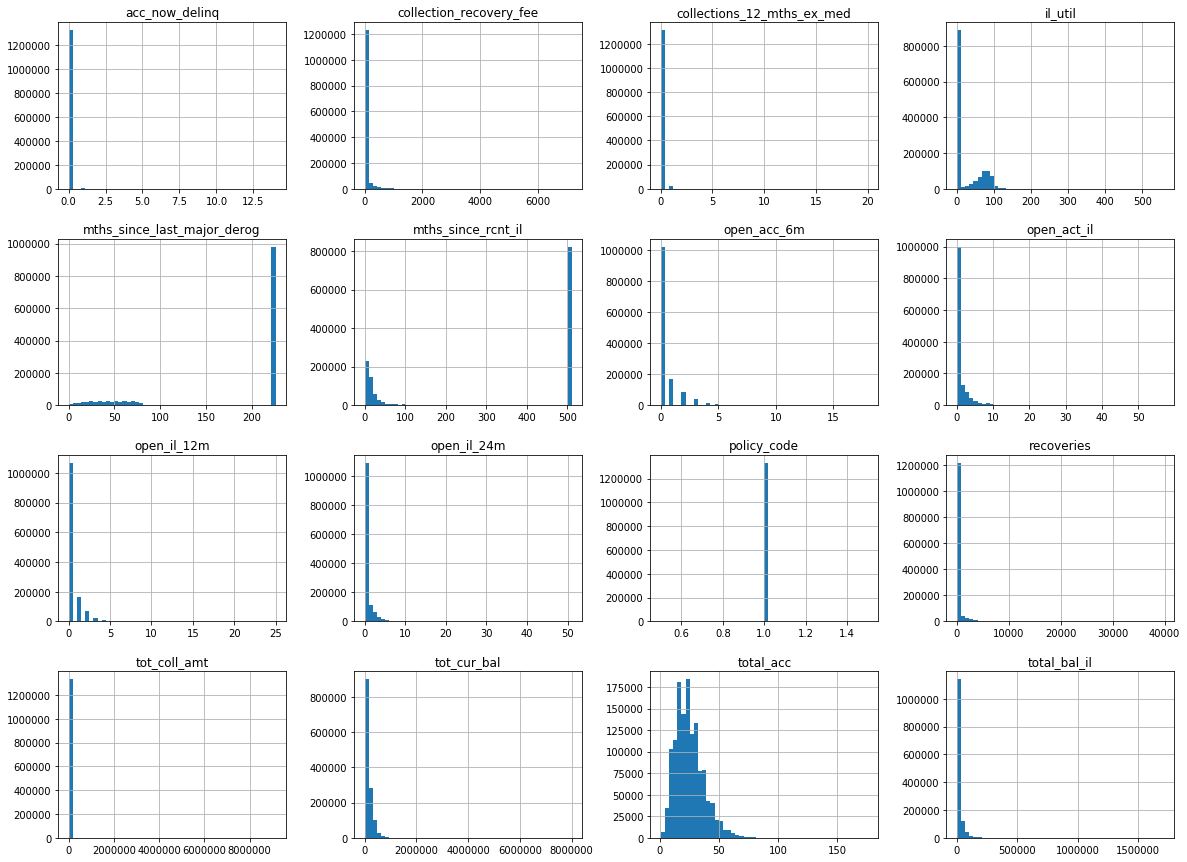

In [91]:
numericas.iloc[:,16:32].hist(bins=50, figsize=(20,15))
plt.show()

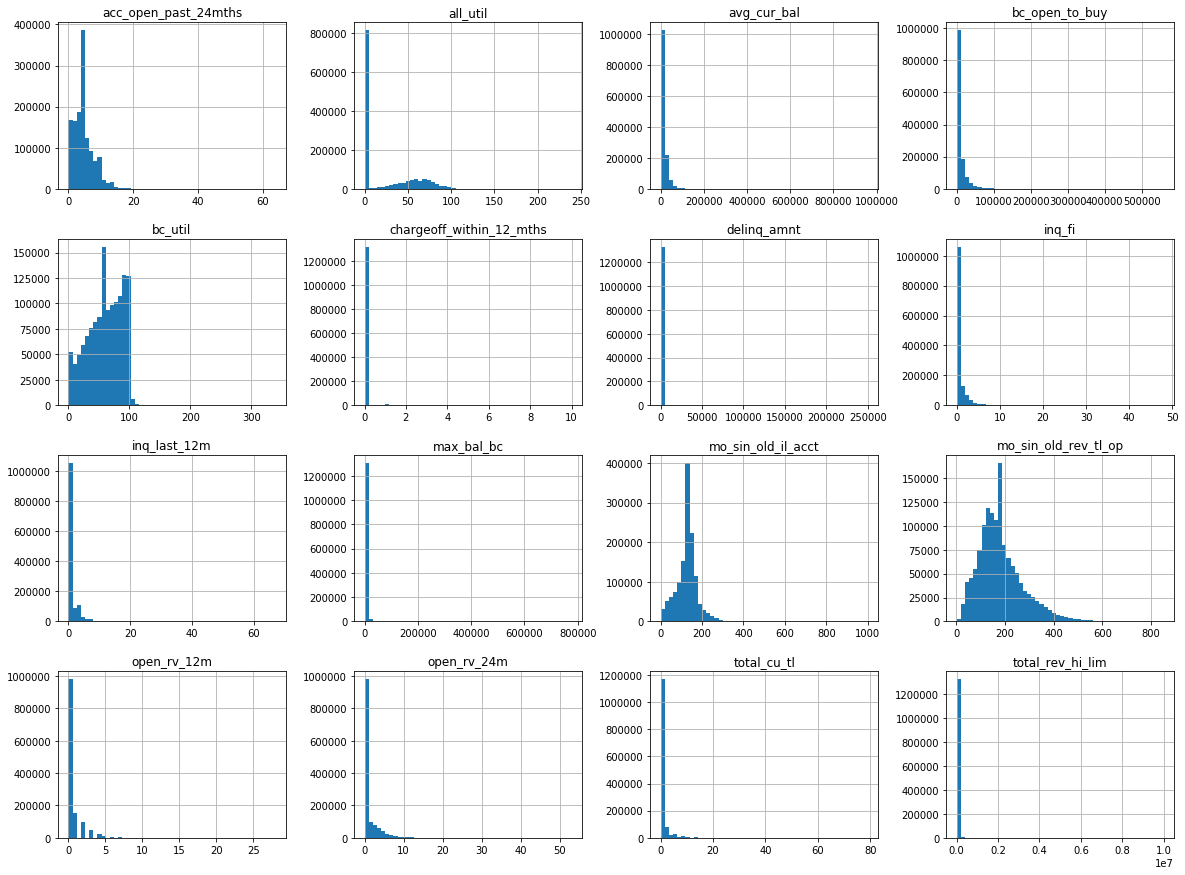

In [92]:
numericas.iloc[:,32:48].hist(bins=50, figsize=(20,15))
plt.show()

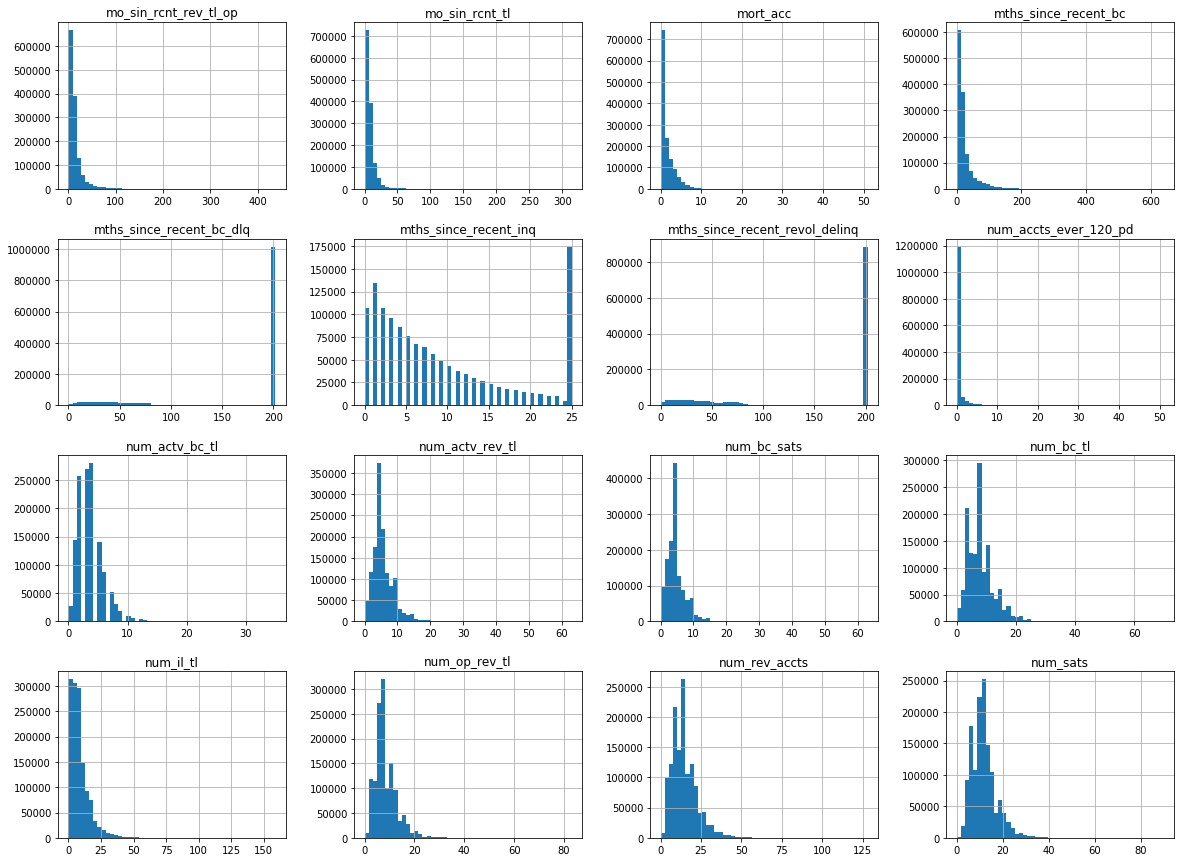

In [93]:
numericas.iloc[:,48:64].hist(bins=50, figsize=(20,15))
plt.show()

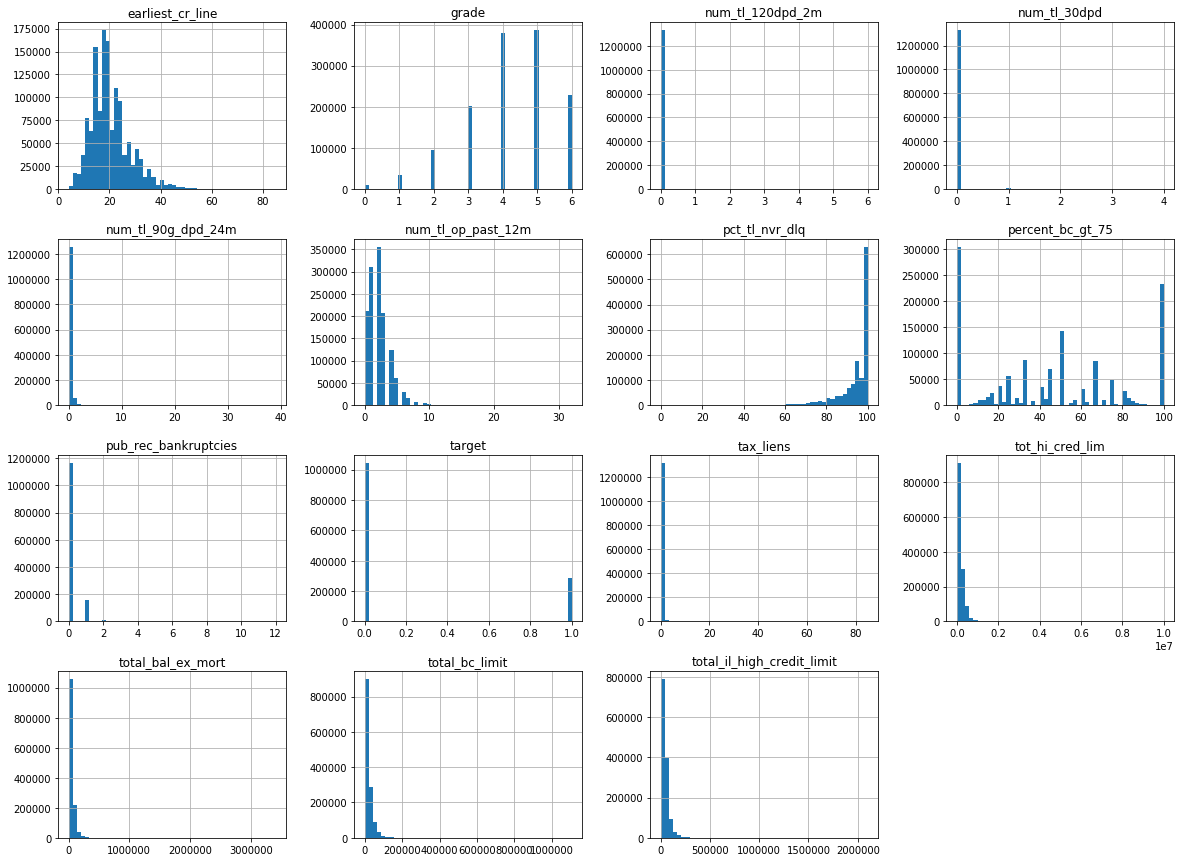

In [94]:
numericas.iloc[:,64:].hist(bins=50, figsize=(20,15))
plt.show()

### 4.1 Outliers 

The method we will use for detecting outliers is called Isolation Forest. It explicitly isolates anomalies constructing normal points and regions by assigning a score to each data point. It takes advantage of the fact that anomalies are the minority data points and that they have attribute-values that are very different from those of normal instances. This algorithm works great with very high dimensional datasets and it proved to be a very effective way of detecting anomalies. 

In [95]:
IF = IsolationForest(max_samples = 100, contamination = 0.05, bootstrap = False, random_state = 1, behaviour = 'new')

In [96]:
%%time

outliers = IF.fit_predict(numericas)
outliers

C:\Users\migue\Anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Wall time: 3min 40s


array([ 1, -1,  1, ...,  1, -1,  1])

This method is very interesting but, why a sample is considered as an outlier by Isolation Forest? We will extract the first outlier was calculated and see if it is really an outlier.

In [97]:
primer_outlier = pd.DataFrame({"Variable":numericas.iloc[1].index, "Valores": numericas.iloc[1]}).set_index("Variable")
primer_outlier

,Valores
Variable,
loan_amnt,40000.00
funded_amnt,40000.00
funded_amnt_inv,40000.00
int_rate,16.14
installment,975.71
...,...
total_bc_limit,45700.00
total_il_high_credit_limit,167965.00
target,0.00


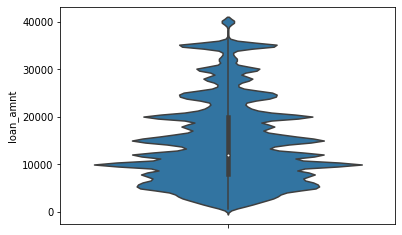

In [98]:
sns.violinplot( y=numericas["loan_amnt"] );

The loan amount of our outlier is 40 000, it is in the top of the violinplot. According to this variable it could be considered as an outlier.

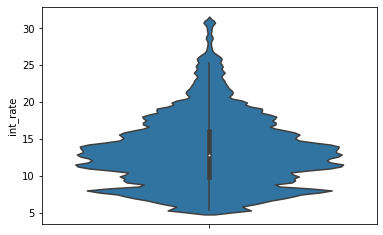

In [99]:
sns.violinplot( y=numericas["int_rate"] );

The interest rate is 16.14%, it is a high interest rate but as we can see in the violinplot it is not an outlier.

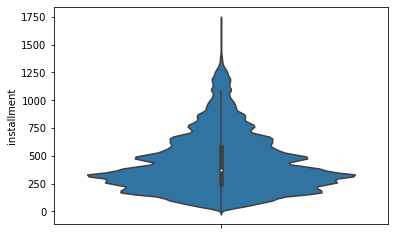

In [100]:
sns.violinplot( y=numericas["installment"] );

The monthly payment if the loan was conceed, 975.71, is high but it not could be considered as an outlier.

The loan amount is a clear evidence to consider that sample as an outlier, also we have 2 more variables in addition which have higher values in comparison to the rest of the dataset. 

First we check both lists have the same length.

In [101]:
len(numericas)

1332021

In [102]:
len(outliers)

1332021

The Isolation Forest returns us an array with 1 and -1. -1 indicates an outlier, so we need to know their index positions in order to delete the samples from the numerical dataframe.

In [103]:
# I do a loop in order to get the index of every -1

indices_outliers = []
for i in range(0,len(outliers)):
    if outliers[i] == -1:
        indices_outliers.append(i)

        
len(indices_outliers)

66601

According to the results we have 93715 outliers. We have a list of the index of every row considered as an outliers, we drop them of the dataset.

In [104]:
# deletting outliers

loan_filtered.drop(indices_outliers, axis = 0, inplace = True)

# reseting the index

loan_filtered = loan_filtered.reset_index(drop = True)

# creating again numericas and categoricas

numericas = loan_filtered.select_dtypes(include = [np.number])

categoricas = loan_filtered.select_dtypes(include = [np.object])

In [105]:
numericas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265420 entries, 0 to 1265419
Data columns (total 79 columns):
loan_amnt                         1265420 non-null int64
funded_amnt                       1265420 non-null int64
funded_amnt_inv                   1265420 non-null float64
int_rate                          1265420 non-null float64
installment                       1265420 non-null float64
annual_inc                        1265420 non-null float64
desc                              1265420 non-null int64
dti                               1265420 non-null float64
delinq_2yrs                       1265420 non-null float64
inq_last_6mths                    1265420 non-null float64
mths_since_last_delinq            1265420 non-null float64
mths_since_last_record            1265420 non-null float64
open_acc                          1265420 non-null float64
pub_rec                           1265420 non-null float64
revol_bal                         1265420 non-null int64
revol_util

In [106]:
categoricas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265420 entries, 0 to 1265419
Data columns (total 6 columns):
term                   1265420 non-null object
emp_length             1265420 non-null object
home_ownership         1265420 non-null object
verification_status    1265420 non-null object
purpose                1265420 non-null object
application_type       1265420 non-null object
dtypes: object(6)
memory usage: 57.9+ MB


### 4.2 Making dummies 

These variables are going to be converted to dummies.

In [107]:
list(categoricas)

['term',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'application_type']

In [108]:
dummies = pd.get_dummies(categoricas)
dummies.head()

,term_ 36 months,term_ 60 months,emp_length_6+ years,emp_length_<= 5 years,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_debt_consolidation,purpose_home,purpose_investment,purpose_medical,purpose_other,purpose_purchase,application_type_Individual,application_type_Joint App
0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1
1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1
2,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0
3,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0
4,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0


In [109]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265420 entries, 0 to 1265419
Data columns (total 18 columns):
term_ 36 months                        1265420 non-null uint8
term_ 60 months                        1265420 non-null uint8
emp_length_6+ years                    1265420 non-null uint8
emp_length_<= 5 years                  1265420 non-null uint8
home_ownership_OTHER                   1265420 non-null uint8
home_ownership_OWN                     1265420 non-null uint8
home_ownership_RENT                    1265420 non-null uint8
verification_status_Not Verified       1265420 non-null uint8
verification_status_Source Verified    1265420 non-null uint8
verification_status_Verified           1265420 non-null uint8
purpose_debt_consolidation             1265420 non-null uint8
purpose_home                           1265420 non-null uint8
purpose_investment                     1265420 non-null uint8
purpose_medical                        1265420 non-null uint8
purpose_other      

In [110]:
# deletting the original variables to the dataset

del loan_filtered['term']
del loan_filtered['emp_length']
del loan_filtered['home_ownership']
del loan_filtered['verification_status']
del loan_filtered['purpose']
del loan_filtered['application_type']

In [112]:
dummies['target'] = loan_filtered['target']
dummies['desc'] = loan_filtered['desc']
dummies['grade'] = loan_filtered['grade']

### 4.3 Scaling

Before concatenating the dummies we will scale the numeric variables of the dataset, we are going to use the Robust method.

In [117]:
del numericas['target']
del numericas['desc']
del numericas['grade']

In [118]:
scaler = preprocessing.RobustScaler()
num_scaled = scaler.fit_transform(numericas)
num_scaled = pd.DataFrame(num_scaled, columns=[numericas])

In [119]:
# concatenating the dummies

loan_filtered_final = pd.concat([num_scaled, dummies], axis = 1)
loan_filtered_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265420 entries, 0 to 1265419
Data columns (total 97 columns):
(loan_amnt,)                           1265420 non-null float64
(funded_amnt,)                         1265420 non-null float64
(funded_amnt_inv,)                     1265420 non-null float64
(int_rate,)                            1265420 non-null float64
(installment,)                         1265420 non-null float64
(annual_inc,)                          1265420 non-null float64
(dti,)                                 1265420 non-null float64
(delinq_2yrs,)                         1265420 non-null float64
(inq_last_6mths,)                      1265420 non-null float64
(mths_since_last_delinq,)              1265420 non-null float64
(mths_since_last_record,)              1265420 non-null float64
(open_acc,)                            1265420 non-null float64
(pub_rec,)                             1265420 non-null float64
(revol_bal,)                           1265420 non-null

In [120]:
loan_filtered_final.head()

,"(loan_amnt,)","(funded_amnt,)","(funded_amnt_inv,)","(int_rate,)","(installment,)","(annual_inc,)","(dti,)","(delinq_2yrs,)","(inq_last_6mths,)","(mths_since_last_delinq,)",...,purpose_home,purpose_investment,purpose_medical,purpose_other,purpose_purchase,application_type_Individual,application_type_Joint App,target,desc,grade
0,1.475410,1.472393,1.466395,1.540064,2.468572,0.840909,1.062346,0.0,0.0,-0.902062,...,0,0,0,0,0,0,1,0,0,3
1,0.655738,0.654397,0.651731,-0.830128,0.799507,0.840909,0.115669,0.0,0.0,-0.917526,...,0,0,0,0,1,0,1,0,0,6
2,-0.614754,-0.613497,-0.610998,-0.229167,-0.699675,-0.556818,-1.055783,0.0,0.0,-1.036082,...,0,0,0,0,1,1,0,0,0,5
3,0.655738,0.654397,0.651731,0.838141,0.435900,-0.136364,0.383101,0.0,0.0,0.000000,...,0,0,0,0,0,1,0,0,0,3
4,-0.442623,-0.441718,-0.462322,-0.229167,-0.481568,-0.409091,-0.106645,0.0,0.0,0.000000,...,0,0,0,0,1,1,0,0,0,5


In [121]:
list(dummies)

['term_ 36 months',
 'term_ 60 months',
 'emp_length_6+ years',
 'emp_length_<= 5 years',
 'home_ownership_OTHER',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'verification_status_Not Verified',
 'verification_status_Source Verified',
 'verification_status_Verified',
 'purpose_debt_consolidation',
 'purpose_home',
 'purpose_investment',
 'purpose_medical',
 'purpose_other',
 'purpose_purchase',
 'application_type_Individual',
 'application_type_Joint App',
 'target',
 'desc',
 'grade']

In [122]:
out_dummies = ['term_ 36 months', 'emp_length_<= 5 years', 'home_ownership_OTHER', 'verification_status_Not Verified',
              'purpose_debt_consolidation', 'application_type_Individual']

# Lasso

In [123]:
# endógena

endogena = ['target'] 

# exógenas

exogenas = list(set(list(loan_filtered_final.columns))-set(endogena)-set(list(out_dummies))) 

X = loan_filtered_final[exogenas].values
Y = loan_filtered_final[endogena].values

We want to know the significance of every variable, so we do a lasso regression. Lasso regression will return us the coefficients of every variable, those who are enough little will not be significant. We need to establish a cut off for the values of the coefficients.

In [124]:
%%time
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 200, normalize = True)
lassocv.fit(X, Y)
lassocv.alpha_

model_lasso = Lasso(alpha=lassocv.alpha_) # lasso function
model_lasso.fit(X, Y)

C:\Users\migue\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\migue\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.69887004804332, tolerance: 20.92143923906734
  positive)


Wall time: 4min 5s


C:\Users\migue\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75189.96189531931, tolerance: 20.92143923906734
  positive)


Lasso(alpha=1.708916996660333e-07, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [125]:
lasso_coefficients = pd.DataFrame(model_lasso.coef_, exogenas, columns = ['Coefficients'])
lasso_coefficients.loc['Intercept'] = model_lasso.intercept_
lasso_coefficients

,Coefficients
verification_status_Source Verified,0.013144
"(total_rev_hi_lim,)",0.000104
"(open_rv_24m,)",0.002844
grade,-0.012090
home_ownership_OWN,0.017233
...,...
"(pct_tl_nvr_dlq,)",0.003477
"(inq_fi,)",0.002199
emp_length_6+ years,0.003441
"(loan_amnt,)",0.023319


The top 20 positive coefficients.

In [126]:
lasso_coefficients.sort_values(['Coefficients'], ascending = False).head(20)

,Coefficients
Intercept,0.141706
term_ 60 months,0.100589
"(all_util,)",0.064878
"(funded_amnt,)",0.064029
purpose_investment,0.057116
"(installment,)",0.044950
application_type_Joint App,0.043581
home_ownership_RENT,0.034709
"(int_rate,)",0.027102
"(num_actv_rev_tl,)",0.023716


In [127]:
lasso_coefficients.sort_values(['Coefficients']).head(20)

,Coefficients
"(funded_amnt_inv,)",-0.158315
"(mths_since_rcnt_il,)",-0.029295
desc,-0.020632
"(il_util,)",-0.016713
"(total_bc_limit,)",-0.015387
"(total_acc,)",-0.015288
"(mort_acc,)",-0.013768
grade,-0.012090
"(total_il_high_credit_limit,)",-0.011692
"(acc_now_delinq,)",-0.010577


We have 91 coefficients but we can not work with all of them. We will establish a cut off in an absolute value bigger than 0.02.

In [128]:
important_variables = lasso_coefficients[(lasso_coefficients['Coefficients'] > 0.02) | (lasso_coefficients['Coefficients'] < -0.02)]
important_variables.sort_values(['Coefficients'], ascending = False)

,Coefficients
Intercept,0.141706
term_ 60 months,0.100589
"(all_util,)",0.064878
"(funded_amnt,)",0.064029
purpose_investment,0.057116
"(installment,)",0.044950
application_type_Joint App,0.043581
home_ownership_RENT,0.034709
"(int_rate,)",0.027102
"(num_actv_rev_tl,)",0.023716


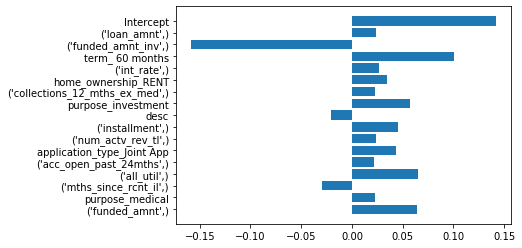

In [129]:
height = important_variables.Coefficients
bars = important_variables.index
y_pos = np.arange(len(bars))

# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
 
# Show graphic
plt.show()

Here we have the most important variables, which we will use in the next predicting methods.

In [130]:
final_variables = list(important_variables.index)
final_variables

[('funded_amnt',),
 'purpose_medical',
 ('mths_since_rcnt_il',),
 ('all_util',),
 ('acc_open_past_24mths',),
 'application_type_Joint App',
 ('num_actv_rev_tl',),
 ('installment',),
 'desc',
 'purpose_investment',
 ('collections_12_mths_ex_med',),
 'home_ownership_RENT',
 ('int_rate',),
 'term_ 60 months',
 ('funded_amnt_inv',),
 ('loan_amnt',),
 'Intercept']

In [131]:
final_independents = [('funded_amnt',),
 'purpose_medical',
 ('mths_since_rcnt_il',),
 ('all_util',),
 ('acc_open_past_24mths',),
 'application_type_Joint App',
 ('num_actv_rev_tl',),
 ('installment',),
 'desc',
 'purpose_investment',
 ('collections_12_mths_ex_med',),
 'home_ownership_RENT',
 ('int_rate',),
 'term_ 60 months',
 ('funded_amnt_inv',),
 ('loan_amnt',)]

In [132]:
final_df = loan_filtered_final.loc[:,[('funded_amnt',),
 'purpose_medical',
 ('mths_since_rcnt_il',),
 ('all_util',),
 ('acc_open_past_24mths',),
 'application_type_Joint App',
 ('num_actv_rev_tl',),
 ('installment',),
 'desc',
 'purpose_investment',
 ('collections_12_mths_ex_med',),
 'home_ownership_RENT',
 ('int_rate',),
 'term_ 60 months',
 ('funded_amnt_inv',),
 ('loan_amnt',)]]

In [133]:
final_df['target'] = loan_filtered_final['target']
final_df

,"(funded_amnt,)",purpose_medical,"(mths_since_rcnt_il,)","(all_util,)","(acc_open_past_24mths,)",application_type_Joint App,"(num_actv_rev_tl,)","(installment,)",desc,purpose_investment,"(collections_12_mths_ex_med,)",home_ownership_RENT,"(int_rate,)",term_ 60 months,"(funded_amnt_inv,)","(loan_amnt,)",target
0,1.472393,0,-1.036660,1.224490,0.00,1,-0.25,2.468572,0,0,0.0,0,1.540064,0,1.466395,1.475410,0
1,0.654397,0,-1.014257,0.795918,0.25,1,0.00,0.799507,0,0,0.0,0,-0.830128,0,0.651731,0.655738,0
2,-0.613497,0,-1.034623,1.102041,1.00,0,0.00,-0.699675,0,0,0.0,1,-0.229167,0,-0.610998,-0.614754,0
3,0.654397,0,-0.881874,0.938776,-0.25,0,0.50,0.435900,0,0,0.0,1,0.838141,1,0.651731,0.655738,0
4,-0.441718,0,-0.985743,1.428571,-0.50,0,-0.75,-0.481568,0,0,0.0,1,-0.229167,0,-0.462322,-0.442623,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265415,-0.163599,0,-1.022403,1.714286,0.25,0,-0.50,-0.169945,0,1,0.0,1,2.560897,1,-0.162933,-0.163934,0
1265416,1.063395,0,-1.028513,0.816327,1.25,0,0.00,1.419058,0,0,0.0,1,2.870192,1,1.059063,1.065574,0
1265417,0.490798,0,-1.032587,1.204082,0.50,0,0.00,0.694938,0,0,0.0,0,2.870192,1,0.488798,0.491803,1
1265418,0.486708,0,-1.018330,0.938776,0.25,0,0.00,0.672988,0,0,0.0,0,2.793269,1,0.484725,0.487705,0


# Logistic Regression

Logistic regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes).

We modify our exogenous variables including the categories of the dummies that we have deleted before whe we went to do the lasso regression.

In [134]:
# endógena

endogena = ['target'] 

# exógenas

exogenas = list(set(list(final_df.columns))-set(endogena))

X = final_df[exogenas].values
Y = final_df[endogena].values

To do the logistic regression (and the other methods) we have to split the dataset into two parts, train and test. We know that the dataset is imbalanced, we have a lot of cases of non default and a few cases os default in comparisson. To solve that problem, we will apply a method of oversampling called Smote. Smote function creates synthetic samples of the minority class making the minority class equal to the majority class. To do that Smote selects similar records.

In [135]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=40)
sm = SMOTE(random_state=40, sampling_strategy = 0.4)
X_train, Y_train = sm.fit_sample(X_train, Y_train)
print(X_train.shape); print(X_test.shape)

C:\Users\migue\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(1120827, 16)
(253084, 16)


Realise that we only do that over the train, the test must stay with the original distribution.

In [136]:
ytrain_df = pd.DataFrame(Y_train, columns = ['target'])
ytest_df = pd.DataFrame(Y_test, columns = ['target'])

Here we can see the distribution of defaults and non defaults in the training set.

In [137]:
ytrain_df['target'].value_counts(normalize=True)

0    0.714286
1    0.285714
Name: target, dtype: float64

And here the distribution of defaults and no defaults in the testing set.

In [138]:
ytest_df['target'].value_counts(normalize=True)

0    0.791547
1    0.208453
Name: target, dtype: float64

In [139]:
%%time
logit_loan = LogisticRegression(random_state=40, solver="saga", penalty="l1", class_weight="balanced", C=1.0, max_iter=500)
logit_loan.fit(X_train, Y_train)
logit_probs = logit_loan.predict_proba(X_train)
logit_scores = logit_probs[:,1]

Wall time: 13.8 s


In [140]:
pred_logit = logit_loan.predict(X_test)
print(confusion_matrix(Y_test, pred_logit))
print(classification_report(Y_test, pred_logit))

[[135623  64705]
 [ 20203  32553]]
              precision    recall  f1-score   support

           0       0.87      0.68      0.76    200328
           1       0.33      0.62      0.43     52756

    accuracy                           0.66    253084
   macro avg       0.60      0.65      0.60    253084
weighted avg       0.76      0.66      0.69    253084



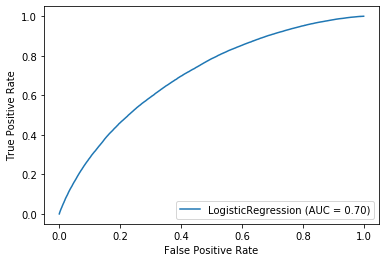

Logistic Regression score train:  0.6606987519037282
Logistic Regression score:  0.664506646014762


In [141]:
metrics.plot_roc_curve(logit_loan, X_test, Y_test)
plt.show()                     
print("Logistic Regression score train: ", logit_loan.score(X_train, Y_train))
print("Logistic Regression score: ", logit_loan.score(X_test, Y_test))

# Support Vector Machine

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

We will do a grid search in order to find the optimus hyperparameters of our SVM.

In [142]:
%%time
param_test3 = {'C': [1, 10], 'kernel': ('linear', 'rbf')}
gsearch_SVM = GridSearchCV(estimator=SVC(max_iter = 1000),
             param_grid= param_test3 , scoring='roc_auc', n_jobs=-1, iid=False, cv=5)
gsearch_SVM.fit(X_train, Y_train)

C:\Users\migue\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Wall time: 5min 36s


C:\Users\migue\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=1000,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid=False, n_jobs=-1,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

Here we have the best hyperparameters of our SVM.

In [143]:
gsearch_SVM.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=1000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [144]:
%%time
gsearch_SVM2 = gsearch_SVM.best_estimator_
gsearch_SVM2.fit(X_train, Y_train)

Wall time: 50.5 s


C:\Users\migue\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=1000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Finally, once the SVM has been estimated, we predict and show the results through the confussion matrix.

In [145]:
Y_pred_gsearch_SVM2 = gsearch_SVM2.predict(X_test)
print(confusion_matrix(Y_test,Y_pred_gsearch_SVM2))
print(classification_report(Y_test,Y_pred_gsearch_SVM2))

[[    67 200261]
 [    25  52731]]
              precision    recall  f1-score   support

           0       0.73      0.00      0.00    200328
           1       0.21      1.00      0.34     52756

    accuracy                           0.21    253084
   macro avg       0.47      0.50      0.17    253084
weighted avg       0.62      0.21      0.07    253084



We will draw the ROC Curve and calculate the area under the ROC Curve to show the results. It also has been compared the score in the prediction between the sample of the train and test parts.

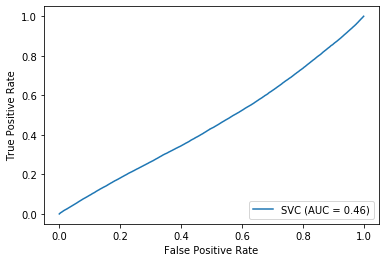

SVM score train:  0.2858523215447165
SVM score:  0.20861848240110004


In [146]:
metrics.plot_roc_curve(gsearch_SVM2, X_test, Y_test)
plt.show() 
print("SVM score train: ", gsearch_SVM2.score(X_train, Y_train))
print("SVM score: ", gsearch_SVM2.score(X_test, Y_test))

# Random Forest

Random Forest, in this case, is a method for classification using an ensamble of many different decision trees. In this method the decision to classify in one class or in other comes frome making the mean of the results of all the decision trees. Random Forest has small variance and is difficult to have overfitting. We use this method because a unique decision tree is so unstable and, for that reason, we train the model with a lot of decision tress.

In [147]:
%%time
param_test1 = {
    'max_depth' : [4,8],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
 }
gsearch_RandomForest = GridSearchCV(estimator = RandomForestClassifier(500), 
                               param_grid = param_test1, scoring='roc_auc',n_jobs=-1, iid=False, cv=5)
gsearch_RandomForest.fit(X_train, Y_train)

C:\Users\migue\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Wall time: 2h 7min 19s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=500, n_jobs=None,
                                              oob_score=False,
                                              rando

In [148]:
gsearch_RandomForest.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}

Here we have the best hyperparameters of our Random Forest model.

In [149]:
gsearch_RandomForest.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [150]:
%%time
gsearch_RandomForest2 = gsearch_RandomForest.best_estimator_
gsearch_RandomForest2.fit(X_train, Y_train)

Wall time: 14min 53s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [151]:
Y_pred_gsearch_RandomForest2 = gsearch_RandomForest2.predict(X_test)

[6.75245483e-02 6.16914152e-03 1.62076673e-02 5.82641808e-02
 1.99171077e-03 2.85449385e-02 1.14379236e-03 1.93773628e-01
 2.11820286e-04 3.28216344e-02 8.35035882e-05 1.20940524e-02
 4.77163488e-02 5.05534803e-01 1.30064764e-02 1.49117529e-02]


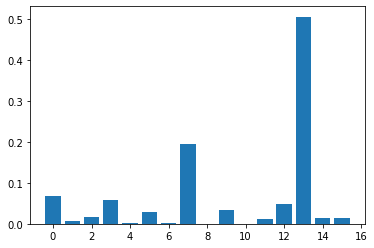

In [152]:
print(gsearch_RandomForest2.feature_importances_)

list(gsearch_RandomForest2.feature_importances_)

plt.bar(range(len(gsearch_RandomForest2.feature_importances_)), gsearch_RandomForest2.feature_importances_)
plt.show()

In [153]:
pd.DataFrame(gsearch_RandomForest2.feature_importances_, final_independents, columns = ['Importance'])

,Importance
"(funded_amnt,)",0.067525
purpose_medical,0.006169
"(mths_since_rcnt_il,)",0.016208
"(all_util,)",0.058264
"(acc_open_past_24mths,)",0.001992
application_type_Joint App,0.028545
"(num_actv_rev_tl,)",0.001144
"(installment,)",0.193774
desc,0.000212
purpose_investment,0.032822


As it can see above, the most importance variables in the Random Forest model are the period in which the loan will be pay, in this case in 60 months, and the installment. The importance of the first one is bigger than the second one by far.

After that, and once the Random Forest model has been estimated, we predict and show the results through the confussion matrix.

In [155]:
print(confusion_matrix(Y_test,Y_pred_gsearch_RandomForest2))
print(classification_report(Y_test,Y_pred_gsearch_RandomForest2))

[[192618   7710]
 [ 45331   7425]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88    200328
           1       0.49      0.14      0.22     52756

    accuracy                           0.79    253084
   macro avg       0.65      0.55      0.55    253084
weighted avg       0.74      0.79      0.74    253084



Finally, we show the ROC curve and the area under the curve. Also, it has been compared the score in the prediction between the sample of the train and test parts.

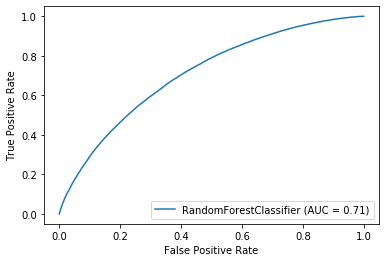

Random Forest score train:  0.7327419842669743
Random Forest score:  0.790421362077413


In [156]:
metrics.plot_roc_curve(gsearch_RandomForest2, X_test, Y_test)
plt.show() 
print("Random Forest score train: ", gsearch_RandomForest2.score(X_train, Y_train))
print("Random Forest score: ", gsearch_RandomForest2.score(X_test, Y_test))

# XGBoost

XGBoost is a method for classification similar to the Random Forest model, that uses an ensamble of many different decision trees. The difference with the Random Forest is that XGBoost has more variance, it could have problems with overfitting and it usually has more accuracy with less number of estimators. In this method the cases that have failed previously in their classification have more importance for the model, so they are used again in next samples to try to classify them correctly.

In [157]:
%%time
param_test2 = {
 'learning_rate':np.arange(0.1,2.0,0.2),
 'objective':['binary:logistic'],
 'gamma': [0.5, 1, 1.5, 2],
 'subsample': [0.6, 0.8, 1.0],
 'colsample_bytree': [0.6, 0.8, 1.0],
 'max_depth': [3, 4, 5, 8]
}
gsearch_XGBoost = GridSearchCV(estimator = xgb.XGBClassifier(n_estimators=500, subsample=0.8,
                                                             colsample_bytree=0.8,objective= 'binary:logistic',
                                                             scale_pos_weight=1, seed=40, nthread = 6), 
                               param_grid = param_test1, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
gsearch_XGBoost.fit(X_train, Y_train)

C:\Users\migue\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Wall time: 1h 36min 22s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=500, n_jobs=1,
                                     nthread=6, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=40, silent=None,
                                     subsample=0.8, verbosity=1),
             iid=False, n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 8],
                         'max_features': ['auto', 'sqrt', 'log2']},
             pre_dispatch='2*n_jobs', r

In [158]:
gsearch_XGBoost.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}

Here we have the best hyperparameters of our XGBoost Model.

In [159]:
gsearch_XGBoost.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, criterion='gini',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=8,
              max_features='auto', min_child_weight=1, missing=None,
              n_estimators=500, n_jobs=1, nthread=6,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=40, silent=None,
              subsample=0.8, verbosity=1)

In [160]:
%%time
gsearch_XGBoost2 = gsearch_XGBoost.best_estimator_
gsearch_XGBoost2.fit(X_train, Y_train)

Wall time: 2min 48s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, criterion='gini',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=8,
              max_features='auto', min_child_weight=1, missing=None,
              n_estimators=500, n_jobs=1, nthread=6,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=40, silent=None,
              subsample=0.8, verbosity=1)

[0.03864594 0.05908486 0.02188196 0.0853141  0.01944811 0.07536884
 0.01756231 0.25520095 0.01268188 0.08900193 0.00850023 0.01890693
 0.06672806 0.18299228 0.01000454 0.03867711]


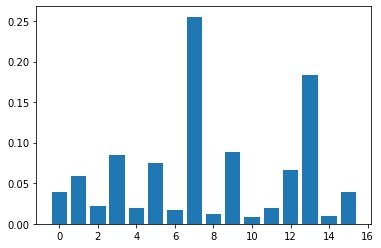

In [162]:
print(gsearch_XGBoost2.feature_importances_)

list(gsearch_XGBoost2.feature_importances_)

plt.bar(range(len(gsearch_XGBoost2.feature_importances_)), gsearch_XGBoost2.feature_importances_)
plt.show()

In [163]:
pd.DataFrame(gsearch_XGBoost2.feature_importances_, final_independents, columns = ['Importance'])

,Importance
"(funded_amnt,)",0.038646
purpose_medical,0.059085
"(mths_since_rcnt_il,)",0.021882
"(all_util,)",0.085314
"(acc_open_past_24mths,)",0.019448
application_type_Joint App,0.075369
"(num_actv_rev_tl,)",0.017562
"(installment,)",0.255201
desc,0.012682
purpose_investment,0.089002


As it can see above, the most importance variables in the XGBoost model are the same that ones in the Random Forest model, period in which the loan will be pay, in this case in 60 months, and the installment. The importance of the first now is different from the previous model, and the most relevant variable is installment instead the period of months to pay the loan.

Once the XGBoost model has been estimated, we predict and show the results through the confussion matrix.

In [165]:
Y_pred_XGBoost2 = gsearch_XGBoost2.predict(X_test)
print(confusion_matrix(Y_test,Y_pred_XGBoost2))
print(classification_report(Y_test,Y_pred_XGBoost2))

[[194622   5706]
 [ 46657   6099]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.88    200328
           1       0.52      0.12      0.19     52756

    accuracy                           0.79    253084
   macro avg       0.66      0.54      0.54    253084
weighted avg       0.75      0.79      0.74    253084



Finally, we show the ROC curve and the area under the curve. Also, it has been compared the score in the prediction between the sample of the train and test parts.

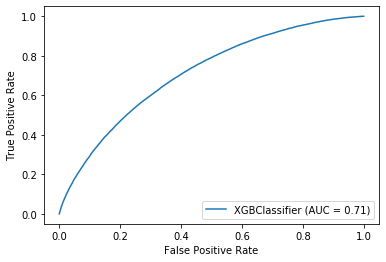

XGBoost score train:  0.8025743491189987
XGBoost score:  0.7931003145200803


In [166]:
metrics.plot_roc_curve(gsearch_XGBoost2, X_test, Y_test)
plt.show() 
print("XGBoost score train: ", gsearch_XGBoost2.score(X_train, Y_train))
print("XGBoost score: ", gsearch_XGBoost2.score(X_test, Y_test))

# ROC Curve comparisson

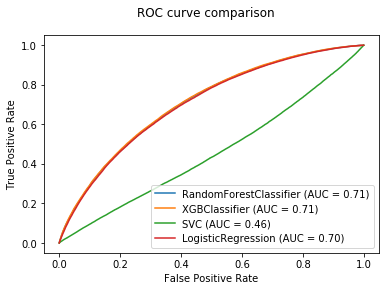

In [167]:
loan_RandomForest_disp = plot_roc_curve(gsearch_RandomForest2, X_test, Y_test)
loan_XGBoost_disp = plot_roc_curve(gsearch_XGBoost2, X_test, Y_test, ax=loan_RandomForest_disp.ax_)
loan_SVM2_disp = plot_roc_curve(gsearch_SVM2, X_test, Y_test, ax=loan_XGBoost_disp.ax_)
loan_LR_disp = plot_roc_curve(logit_loan, X_test, Y_test, ax=loan_SVM2_disp.ax_)
loan_RandomForest_disp.figure_.suptitle("ROC curve comparison")
plt.show()

In [168]:
print('Logistic Regression')
print(classification_report(Y_test,pred_logit))
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'.format(logit_loan.score(X_test, Y_test)))
print('')
print('Support Vector Machine')
print(classification_report(Y_test,Y_pred_gsearch_SVM2))
print('Accuracy of Support Vector Machine classifier on test set: {:.2f}'.format(gsearch_SVM2.score(X_test, Y_test)))
print('')
print('Random Forest')
print(classification_report(Y_test,Y_pred_gsearch_RandomForest2))
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(gsearch_RandomForest2.score(X_test, Y_test)))
print('')
print('XGBoost')
print(classification_report(Y_test,Y_pred_XGBoost2))
print('Accuracy of XGBoost classifier on test set: {:.2f}'.format(gsearch_XGBoost2.score(X_test, Y_test)))
print('')

Logistic Regression
              precision    recall  f1-score   support

           0       0.87      0.68      0.76    200328
           1       0.33      0.62      0.43     52756

    accuracy                           0.66    253084
   macro avg       0.60      0.65      0.60    253084
weighted avg       0.76      0.66      0.69    253084

Accuracy of Logistic Regression classifier on test set: 0.66

Support Vector Machine
              precision    recall  f1-score   support

           0       0.73      0.00      0.00    200328
           1       0.21      1.00      0.34     52756

    accuracy                           0.21    253084
   macro avg       0.47      0.50      0.17    253084
weighted avg       0.62      0.21      0.07    253084

Accuracy of Support Vector Machine classifier on test set: 0.21

Random Forest
              precision    recall  f1-score   support

           0       0.81      0.96      0.88    200328
           1       0.49      0.14      0.22     52756

# Conclusions



First of all, we want to comment the problems that we have when we started to decide which varaibles have to been deleted, also how we should treat the variables, for example if it was better to impute or delete the missing values and how. After that, we also needed to decide how we would identify the outliers values and if we must or not delete them.
The number of the variables in the dataset was so big and, for that reason, we decided to use diferent libraries to solve those problems, always setting differents parameters as limits for deleting cases and other decisions.

Finally, when we had our dataset clean, we tried a Lasso model to know which variables are more important to classify the cases between default and pay.
When we selected the final 15 variables to try more complex models with the results of the Lasso model, we used the following methods:

1. Logistic Regression
2. Support Vector Machine
3. Random Forest
4. XGBoost

The results between those models were so differents. The worst model was the Support Vector Machine, following by the Logistic Regression. The last one has a very similar ROC Curve than the Random Forest and XGBoost ones, but the accuracy is lower and this model identifies very bad the people that made default.
The most difficult decision was to choose one model between the Random Forest and the XGBoost. They are some similar in everything, if we see the two ROC Curves are the same, so we had to compare the differences in the metrics of the confussion matrixs and the score in the test sample, seeing if we could have a overfitting problem or not.

Showing the report of the confussion matrixs metrics, we could apreciate that they have the same accuracy (F1-recall), 0.79, but the XGBoost clasiffy better the cases that are default, with a precision of 0.52, instead the 0.40 of the Random Forest precision. Also, we saw that there are no problems with overfitting in the XGBoost model, because the score of the train sample is 0.80 and in the test sample is 0.79. In Random Forest case is a little bit different, because we have a better score in the test sample than in the train one, and this is rare.

Because of this reasons, we decided that the best model is the XGBoost one, but we have to notice that the precision to classify the default cases is like if we make it by random decision, because it's a precision of 0.52. Our objective is to continue working with the treatment of the variables to solve this problem and, also, make an ensamble to separete the default cases that the model couldn´t identify correctly and analyze appart from all the sample.

# References:

- Sklearn:
    1. SearchGridCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    2. Lasso: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
    3. Logistic Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    4. SVM: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
    5. Random Forest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    6. XGBoost: https://www.kaggle.com/stuarthallows/using-xgboost-with-scikit-learn


